In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

#### 创建Series对象

In [3]:
'''
1、通过列表或数组创建Series对象
    data参数表示数据，index参数表示数据的索引（标签）
   如果没有指定index属性，默认使用数字索引
'''
ser1 = Series(data = [302, 203, 432, 938], index= ['一季度', '二季度', '三季度', '四季度'])
ser1

一季度    302
二季度    203
三季度    432
四季度    938
dtype: int64

In [5]:
'''方法2：通过字典创建Series对象。
    字典中的键就是数据的索引（标签），字典中的值就是数据'''
ser2 = Series({'一季度':302, '二季度':203, '三季度': 432, '四季度':938})
ser2

一季度    302
二季度    203
三季度    432
四季度    938
dtype: int64

#### 索引和切片

跟数组一样，Series对象也可以进行索引和切片操作，不同的是Series对象因为内部维护了一个保存索引的数组，所以除了可以使用整数索引通过位置检索数据外，还可以通过自己设置的索引标签获取对应的数据。b

In [20]:
#使用数值的隐式索引
print(ser2[0], ser2[1], ser2[2])
ser2[0], ser2[3] = 350, 360
print(ser2[-1])
print(ser2)
print(ser2.iloc[2])

380 203 432
360
一季度    350
二季度    203
三季度    432
四季度    360
dtype: int64
432


#### 用自定义的标签索引

In [22]:
#显示索引 
print(ser2['一季度'], ser2['三季度'])
ser2['一季度'] = 380
print(ser2)
print(ser2.loc['一季度'])

380 432
一季度    380
二季度    203
三季度    432
四季度    360
dtype: int64
380


#### Series的基本概念

可以把Series看成一个定长的有序字典

可以通过shape，size，index,values等得到series的属性

In [24]:
print(ser2[1:3])
print(ser2['二季度':'四季度'])

二季度    203
三季度    432
dtype: int64
二季度    203
三季度    432
四季度    360
dtype: int64


In [25]:
ser2[1: 3] = 400, 500
ser2

一季度    380
二季度    400
三季度    500
四季度    360
dtype: int64

In [34]:
#花式索引
print(ser2[['二季度','三季度']])
ser2[['二季度', '三季度']] = 899,677

print(ser2)

二季度    500
三季度    500
dtype: int64
一季度    380
二季度    899
三季度    677
四季度    520
dtype: int64


In [35]:
ser2[ser2 >= 500]

二季度    899
三季度    677
四季度    520
dtype: int64

#### 属性和方法

In [40]:
ser2.dtype

dtype('int64')

In [41]:
ser2.hasnans

False

In [46]:
ser2.index

Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')

In [53]:
ser2.values

array([380, 899, 677, 520], dtype=int64)

In [47]:
ser2.is_monotonic

False

In [48]:
ser2.is_monotonic_increasing

False

In [49]:
ser2.is_monotonic_decreasing

False

In [50]:
ser2.is_unique


True

In [55]:
ser2.size


4

#### 统计相关的方法


In [69]:
#求和
print(ser2.sum())
#求平均值
print(ser2.mean())
#求最大
print(ser2.max())
# 计数
print(ser2.count())
#求标准差
print(ser2.std())
#求方差就
print(ser2.var())
#求中位数
print(ser2.median())

2476
619.0
899
4
222.62524564837653
49562.0
598.5


In [70]:
ser2.describe()

count      4.000000
mean     619.000000
std      222.625246
min      380.000000
25%      485.000000
50%      598.500000
75%      732.500000
max      899.000000
dtype: float64

In [72]:
ser2.value_counts()

677    1
380    1
899    1
520    1
dtype: int64

In [73]:
ser2.unique()

array([380, 899, 677, 520], dtype=int64)

如果Series对象有重复的值，我们可以使用unique()方法获得去重之后的Series对象；可以使用nunique()方法统计不重复值的数量；
如果想要统计每个值重复的次数，可以使用value_counts()方法，这个方法会返回一个Series对象，它的索引就是原来的Series对象中的值，
而每个值出现的次数就是返回的Series对象中的数据，
在默认情况下会按照出现次数做降序排列。

In [76]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
dtype: int64

In [77]:
ser3.nunique()

4

#### 数据处理的方法

In [82]:
ser4 = Series(data = [10, 20, np.NaN, 30, np.NaN])
ser4.isnull()
ser4.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

Series对象的dropna()和fillna()方法分别用来删除空值和填充空值，具体的用法如下所示。

In [84]:
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [85]:
# 将空值填充为40
ser4.fillna(value=40)

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

In [87]:
ser4


0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64

In [86]:
# backfill或bfill表示用后一个元素的值填充空值
# ffill或pad表示用前一个元素的值填充空值
ser4.fillna(method='ffill')

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

需要提醒大家注意的是，dropna()和fillna()方法都有一个名为inplace的参数，它的默认值是False，
表示删除空值或填充空值不会修改原来的Series对象，而是返回一个新的Series对象来表示删除或填充空值后的数据系列，
如果将inplace参数的值修改为True，那么删除或填充空值会就地操作，直接修改原来的Series对象，那么方法的返回值是None。
后面我们会接触到的很多方法，包括DataFrame对象的很多方法都会有这个参数，它们的意义跟这里是一样的

In [93]:
ser5 = Series(range(5))
print(ser5)
ser5.where(ser5>0)

0    0
1    1
2    2
3    3
4    4
dtype: int64


0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [94]:

#Series对象的mask()和where()方法可以将满足或不满足条件的值进行替换，如下所示。
ser5.where(ser5 > 1, 10)

0    10
1    10
2     2
3     3
4     4
dtype: int64

In [95]:
ser5.mask(ser5 > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

Series对象的duplicated()方法可以帮助我们找出重复的数据，而drop_duplicates()方法可以帮我们删除重复数据。

In [97]:
ser3.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [98]:
ser3


0     apple
1    banana
2     apple
3    pitaya
4     apple
5    pitaya
6    durian
dtype: object

In [99]:
ser3.drop_duplicates()

0     apple
1    banana
3    pitaya
6    durian
dtype: object

In [102]:
ser6 = Series(['cat', 'dog',  np.NaN, 'rabit'])
ser6

0      cat
1      dog
2      NaN
3    rabit
dtype: object

In [105]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [106]:
ser6.map('I am a {}'.format, na_action='ignore')

0      I am a cat
1      I am a dog
2             NaN
3    I am a rabit
dtype: object

In [109]:
ser7 = Series([20, 21, 22], index  = ['London', 'New York', 'Helsinki'])
ser7

London      20
New York    21
Helsinki    22
dtype: int64

In [110]:
ser7.apply(np.square)

London      400
New York    441
Helsinki    484
dtype: int64

In [111]:
ser7.apply(lambda x, value: x - value, args=(5, ))

London      15
New York    16
Helsinki    17
dtype: int64

Series对象的sort_index()和sort_values()方法可以用于对索引和数据的排序，排序方法有一个名为ascending的布尔类型参数，
该参数用于控制排序的结果是升序还是降序；而名为kind的参数则用来控制排序使用的算法，默认使用了quicksort，也可以选择mergesort或heapsort；
如果存在空值，那么可以用na_position参数空值放在最前还是最后，默认是last，代码如下所示。

In [122]:
ser8 = Series(data = [35, 96, 12, 57, 25, 89 ], index =['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange'])
#按值的大小进行排序
ser8.sort_values(kind = 'heapsort')

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [121]:
# 按索引从大到小排序
ser8.sort_index(ascending=True,kind = 'mergesort')

apple     57
banana    96
grape     35
orange    89
peach     25
pitaya    12
dtype: int64

如果要从Series对象中找出元素中最大或最小的“Top-N”，实际上是不需要对所有的值进行排序的，
可以使用nlargest()和nsmallest()方法来完成，如下所示。

In [126]:
ser8.nlargest(3)

banana    96
orange    89
apple     57
dtype: int64

In [127]:
ser8.nsmallest(3)

pitaya    12
peach     25
grape     35
dtype: int64

#### 绘制图表

Series对象有一个名为plot的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，
使用Series对象的数据作为纵坐标。

In [ ]:
# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

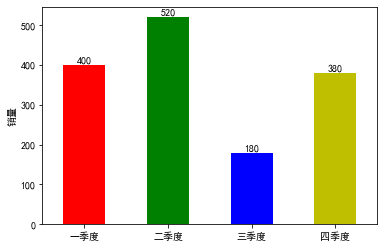

In [148]:
# 创建Series对象并绘制对应的柱状图。
ser9 = Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
# 通过Series对象的plot方法绘图（kind='bar'表示绘制柱状图）
ser9.plot(kind='bar', color=['r', 'g', 'b', 'y'])
# x轴的坐标旋转到0度（中文水平显示）
plt.ylabel('销量')
plt.xticks(rotation=0)
# 在柱状图的柱子上绘制数字
for i in range(4):
    plt.text(i, ser9[i] + 5, ser9[i], ha='center')

# 显示图像
plt.show()

In [140]:
ser9[1] + 5

525

绘制反映每个季度占比的饼图。

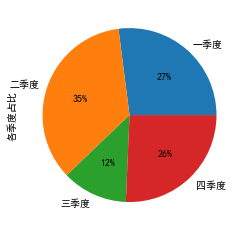

In [138]:
# autopct参数可以配置在饼图上显示每块饼的占比
ser9.plot(kind = 'pie', autopct = '%.lf%%')
# 设置y轴的标签（显示在饼图左侧的文字）
plt.ylabel('各季度占比')
plt.show()